In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv("data/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.duplicated().sum()

1081

In [8]:
df=df.drop_duplicates()

In [9]:
df['Class'].value_counts()


Class
0    283253
1       473
Name: count, dtype: int64

In [10]:
fraud_percentage = df['Class'].value_counts(normalize=True) * 100
fraud_percentage


Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

Fraud rate is extremely low (~0.17%), making this a highly imbalanced classification problem.

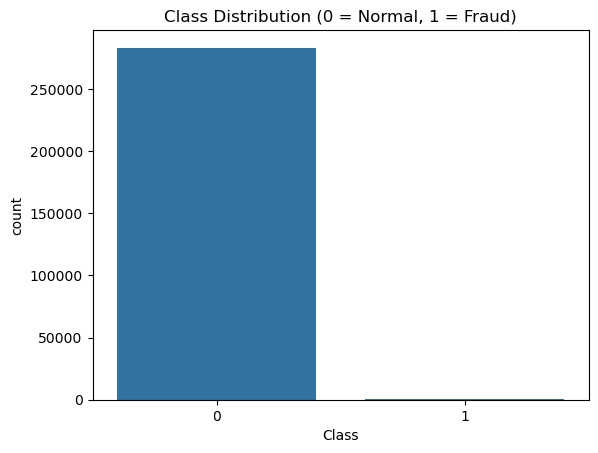

In [12]:
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()


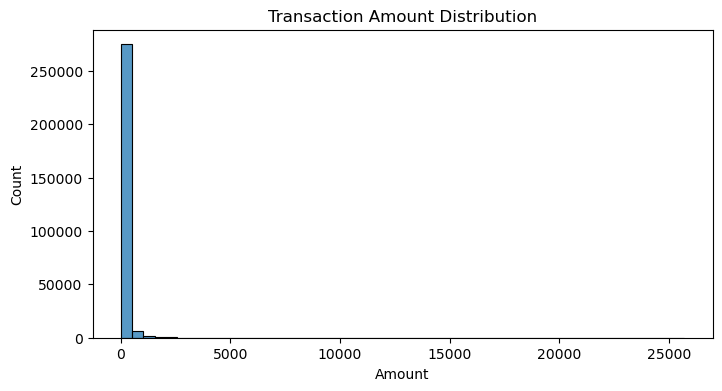

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50)
plt.title("Transaction Amount Distribution")
plt.show()


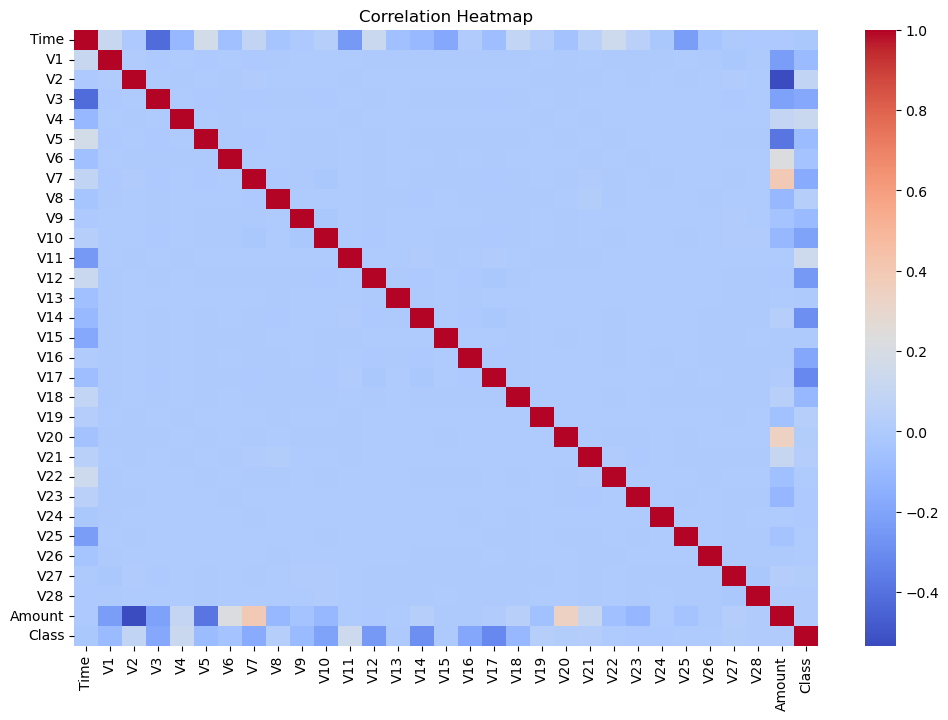

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [15]:
X = df.drop('Class', axis=1)
y = df['Class']


In [16]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746

ROC-AUC: 0.9245828335821638


In [20]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.71      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.8526139270083029


In [21]:
!pip install xgboost


In [22]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight= (len(y_train[y_train==0]) / len(y_train[y_train==1])))
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.77      0.85        95

    accuracy                           1.00     56746
   macro avg       0.98      0.88      0.93     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC: 0.8841840484071911


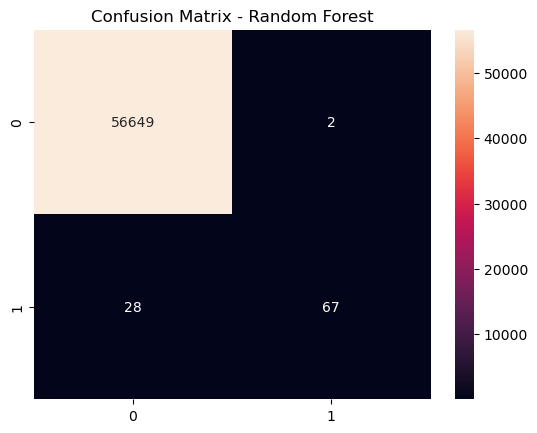

In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [24]:
#Print Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.71      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    n_jobs=-1
)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.92      0.54     56746
weighted avg       1.00      0.97      0.98     56746



In [26]:
y_probs = lr.predict_proba(X_test)[:, 1]


In [27]:
import numpy as np

threshold = 0.7
y_pred_custom = np.where(y_probs > threshold, 1, 0)

print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.10      0.87      0.18        95

    accuracy                           0.99     56746
   macro avg       0.55      0.93      0.59     56746
weighted avg       1.00      0.99      0.99     56746



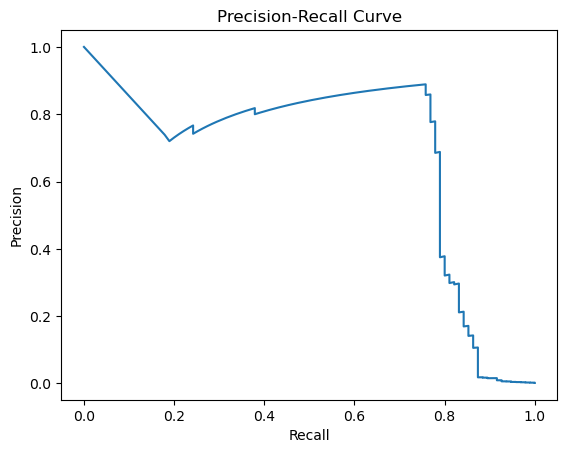

In [28]:
#Fraud detection = imbalanced problem
#So PR curve is more important than accuracy.
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [29]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", roc_score)


ROC-AUC Score: 0.9630752093380616


In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Create model
rf = RandomForestClassifier(random_state=42)

# Train model
rf.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
17,V17,0.156630
14,V14,0.135815
12,V12,0.130210
10,V10,0.087668
16,V16,0.072663
11,V11,0.050887
9,V9,0.033644
18,V18,0.031955
4,V4,0.025765
7,V7,0.024406


In [31]:
#Assume:
#Fraud loss per case = ₹10,000
#False positive review cost = ₹200
TP = 67
FP = 2
FN = 28

fraud_loss = 10000
review_cost = 200

saved_money = TP * fraud_loss
lost_money = FN * fraud_loss
review_expense = FP * review_cost

print("Money Saved:", saved_money)
print("Money Lost:", lost_money)
print("Review Cost:", review_expense)


Money Saved: 670000
Money Lost: 280000
Review Cost: 400


In [32]:
import pickle

pickle.dump(lr, open("fraud_model.pkl", "wb"))


In [33]:
print(df['Class'].value_counts())

# Check percentage
print(df['Class'].value_counts(normalize=True) * 100)


Class
0    283253
1       473
Name: count, dtype: int64
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


In [34]:

X = df.drop('Class', axis=1)
y = df['Class']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (283726, 30)
y shape: (283726,)


In [35]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (226980, 30)
Testing set: (56746, 30)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1️⃣ Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2️⃣ Train model
lr = LogisticRegression(
    class_weight='balanced',
    max_iter=5000,
    solver='liblinear'
)

lr.fit(X_train_scaled, y_train)

# 3️⃣ Get probabilities
y_proba = lr.predict_proba(X_test_scaled)[:, 1]

# 4️⃣ Adjust threshold
threshold = 0.9
y_pred_adjusted = (y_proba > threshold).astype(int)

print("=== Threshold 0.9 ===")
print(classification_report(y_test, y_pred_adjusted))

# 5️⃣ Default threshold (0.5)
y_pred_default = lr.predict(X_test_scaled)

print("=== Default Threshold 0.5 ===")
print(classification_report(y_test, y_pred_default))
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, y_proba)

print("ROC-AUC Score:", roc_score)



=== Threshold 0.9 ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.26      0.83      0.40        95

    accuracy                           1.00     56746
   macro avg       0.63      0.91      0.70     56746
weighted avg       1.00      1.00      1.00     56746

=== Default Threshold 0.5 ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746

ROC-AUC Score: 0.9656552724948415


In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[56430   221]
 [   16    79]]


In [38]:
fraud_loss = 1000     # assume 1 fraud costs $1000
review_cost = 10      # manual review costs $10

FN = 16   # from confusion matrix
FP = 221  # from confusion matrix

total_loss = (FN * fraud_loss) + (FP * review_cost)

print("Estimated Business Cost: $", total_loss)


Estimated Business Cost: $ 18210


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))

print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


## Model Comparison

We compared Logistic Regression and Random Forest.

Random Forest performed better in terms of precision and F1-score,
making it more suitable for real-world fraud detection where
false positives must be minimized.

Final Model Selected: Random Forest

In [41]:
import joblib

joblib.dump(rf, "fraud_model.pkl")


['fraud_model.pkl']

In [42]:
import os
os.getcwd()



'C:\\Users\\aasth\\fraud-detection'

In [43]:
import pickle

pickle.dump(rf, open(r"C:\Users\aasth\fraud-detection\fraud_model.pkl", "wb"))


In [44]:
import pickle

pickle.dump(X_test, open("X_test.pkl", "wb"))
pickle.dump(y_test, open("y_test.pkl", "wb"))


In [80]:
pip install shap


   ---------------------------------------- 0.0/549.3 kB ? eta -:--:--
   ---------------------------------------- 549.3/549.3 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   -- ------------------------------------- 1.0/15.6 MB 16.7 MB/s eta 0:00:01
   --- ------------------------------------ 1.3/15.6 MB 2.7 MB/s eta 0:00:06
   ----- ---------------------------------- 2.1/15.6 MB 4.2 MB/s eta 0:00:04
   ----- ---------------------------------- 2.1/15.6 MB 4.2 MB/s eta 0:00:04
   ------- -------------------------------- 2.9/15.6 MB 2.5 MB/s eta 0:00:06
   -------- ------------------------------- 3.1/15.6 MB 2.8 MB/s eta 0:00:05
   ---------- ----------------------------- 4.2/15.6 MB 2.8 MB/s eta 0:00:05
   ---------- ----------------------------- 4.2/15.6 MB 2.8 MB/s eta 0:00:05
   ---------- ----------------------------- 4.2/15.6 MB 2.8 MB/s eta 0:00:05
   ------------- -------------------------- 5.2/15.6 MB 2.6 MB/s eta 0:00:05
   -----

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.


In [82]:
import numpy
import shap
print(numpy.__version__)



1.26.4


In [84]:
pickle.dump(X_train, open("X_train.pkl", "wb"))
